In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
df  = pd.read_csv("uber.csv")

In [5]:
###Pre-process

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df.info() #To get the required information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [11]:
df.columns #TO get number of columns in the dataset

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [13]:
df = df.drop(['Unnamed: 0', 'key'], axis= 1) #To drop unnamed column as it isn't required

In [15]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [17]:
df.shape #To get the total (Rows,Columns)

(200000, 7)

In [19]:
df.dtypes #To get the type of each column

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [23]:
df.describe() #To get statistics of each columns

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [25]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [27]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)

C:\Users\Shravan\AppData\Local\Temp\ipykernel_1172\1690886834.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
C:\Users\Shravan\AppData\Local\Temp\ipykernel_1172\1690886834.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [29]:
df['dropoff_latitude']

0         40.723217
1         40.750325
2         40.772647
3         40.803349
4         40.761247
            ...    
199995    40.740297
199996    40.739620
199997    40.692588
199998    40.695415
199999    40.768793
Name: dropoff_latitude, Length: 200000, dtype: float64

In [31]:
df.head(10)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5
7,2.5,2012-12-11 13:52:00 UTC,0.000000,0.000000,0.000000,0.000000,1
8,9.7,2012-02-17 09:32:00 UTC,-73.975187,40.745767,-74.002720,40.743537,1
9,12.5,2012-03-29 19:06:00 UTC,-74.001065,40.741787,-73.963040,40.775012,1


In [33]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [35]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [37]:
##Column pickup_datetime is in wrong format (Object). Convert it to DateTime Format

In [39]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime,)

In [40]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [41]:
##To segregate each time of date and time

In [42]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)

In [43]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [44]:
# drop the column 'pickup_daetime' using drop()
# 'axis = 1' drops the specified column

df = df.drop('pickup_datetime',axis=1)


In [45]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [46]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int32
day                    int32
month                  int32
year                   int32
dayofweek              int32
dtype: object

In [47]:
# Checking outliers and filling them

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

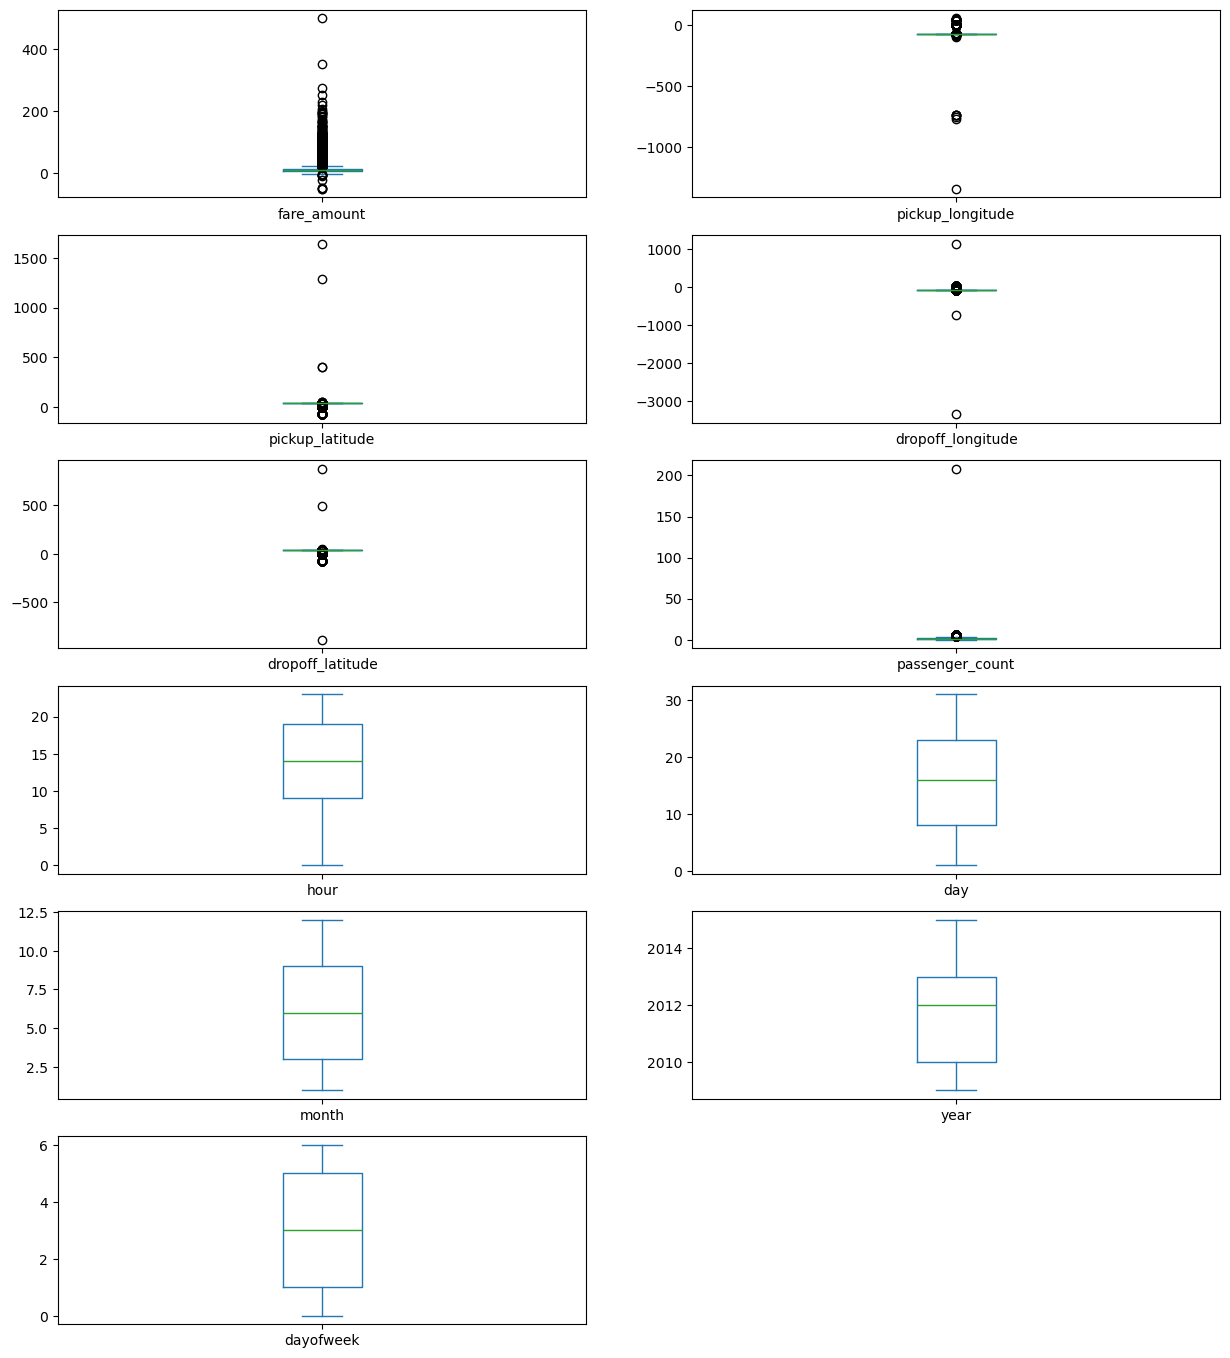

In [48]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot to check the outliers

In [49]:
#Using the InterQuartile Range to fill the values
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [50]:
df = treat_outliers_all(df , df.iloc[: , 0::])

fare_amount             Axes(0.125,0.786098;0.352273x0.0939024)
pickup_longitude     Axes(0.547727,0.786098;0.352273x0.0939024)
pickup_latitude         Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_longitude    Axes(0.547727,0.673415;0.352273x0.0939024)
dropoff_latitude        Axes(0.125,0.560732;0.352273x0.0939024)
passenger_count      Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

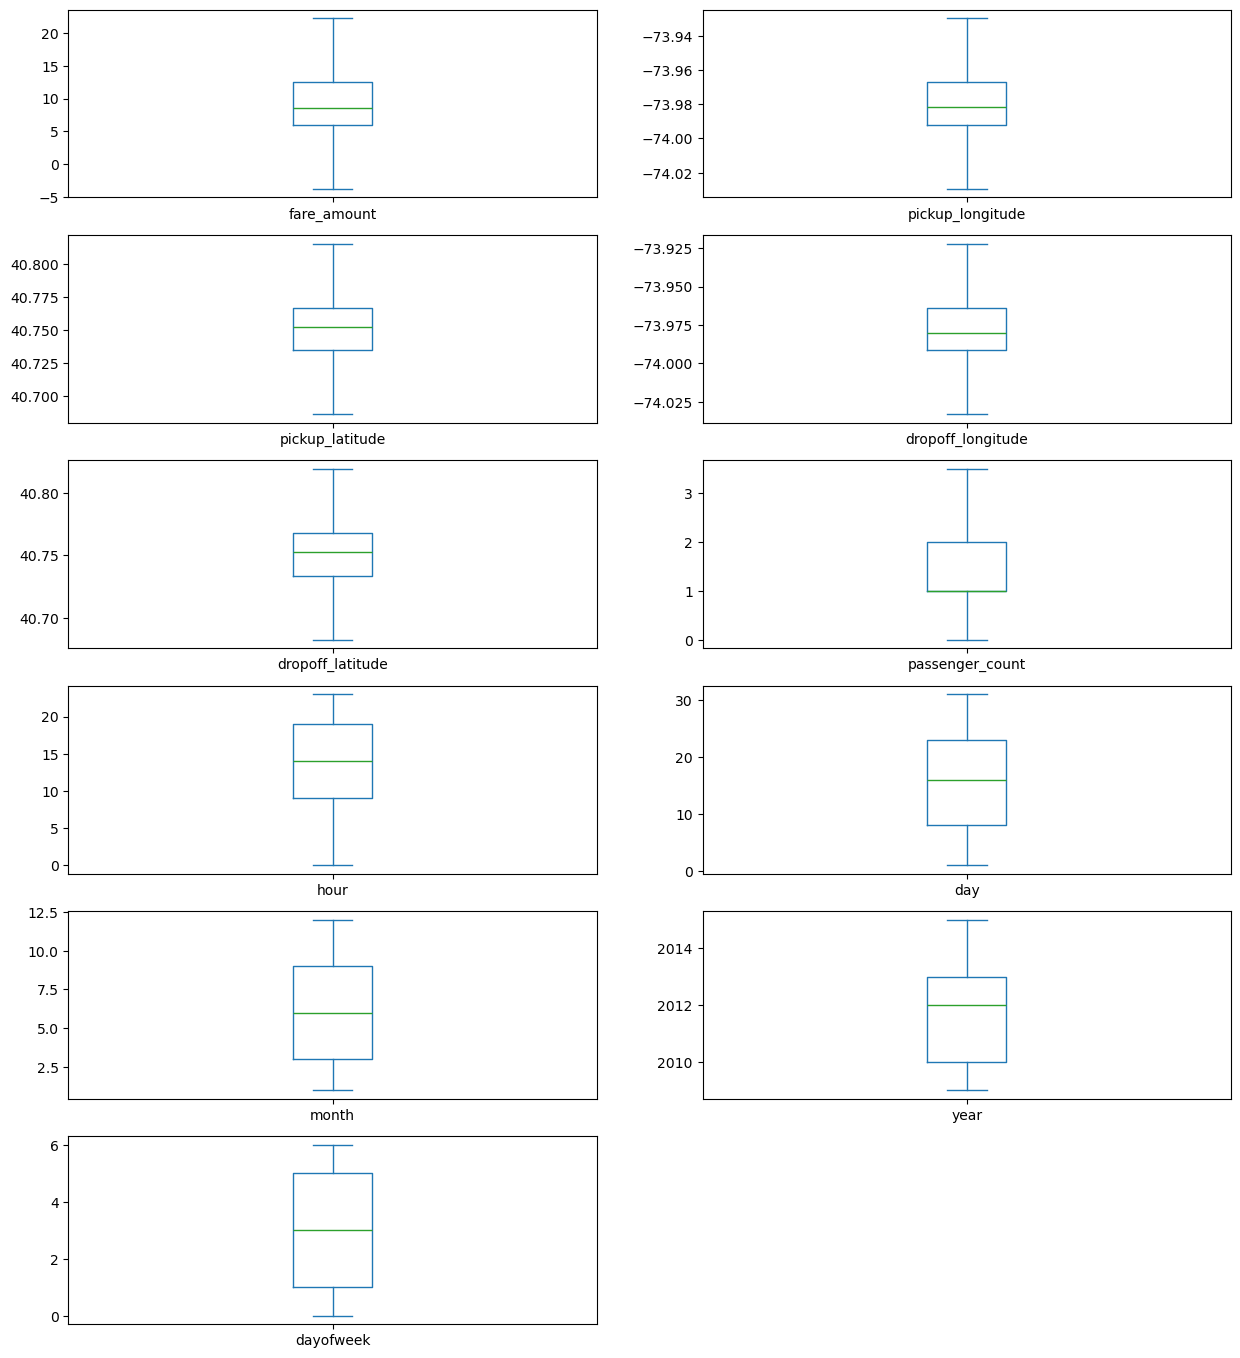

In [51]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20)) #Boxplot shows that dataset is free from outliers

In [52]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # Radius of the Earth in kilometers
    R = 6371.0
    
    # Convert latitude and longitude from degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    
    # Difference in coordinates
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in kilometers
    distance = R * c
    return distance

# Calculate the travel distances
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
    long1, lati1, long2, lati2 = [df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]]
    distance = haversine(lati1, long1, lati2, long2)  # Calculate the distance between the two locations
    travel_dist.append(distance)

df['dist_travel_km'] = travel_dist
df.head()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116083


In [53]:
travel_dist

[1.683322752402931,
 2.4575898837790584,
 5.036377190242993,
 1.661683458435346,
 4.116082504202695,
 0.0,
 9.529763608341751,
 0.7719984707487726,
 2.332711009340077,
 4.889416888104932,
 2.2508576218600655,
 0.7719984707487726,
 0.30225169336801644,
 3.581250827378925,
 1.3099499000119,
 1.7162774216529932,
 0.7299655487752681,
 2.5159500721201353,
 1.7903192532933896,
 1.0347036107860215,
 2.4902437611965915,
 0.9594688591851598,
 1.2613880250404355,
 1.751762582083585,
 6.193235947014278,
 2.7361888046764697,
 0.7232527134113774,
 3.2294390767342174,
 1.4295153219088788,
 2.2336962262344073,
 11.081423971998676,
 1.8950465432768815,
 1.90493270903141,
 3.1821134289666895,
 4.467421006946387,
 2.9230196514159985,
 1.2002121842415259,
 2.6357871666998025,
 2.253610790734642,
 9.186974979043631,
 4.826526866189427,
 1.2502909601091337,
 0.7984731247774794,
 0.8403949918801996,
 0.38519870795789823,
 2.434342813775855,
 3.1279052128174074,
 3.734645613940409,
 0.0,
 4.504354287329575,


In [54]:
#Uber doesn't travel over 130 kms so minimize the distance
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


In [55]:
#Finding inccorect latitude (Less than or greater than 90) and longitude (greater than or less than 180)
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
                                   (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
                                   (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
                                   (df.dropoff_longitude > 180) |(df.dropoff_longitude < -180)
                                    ]

In [56]:
incorrect_coordinates

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km


In [57]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [58]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.0,-73.929786,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.116083


In [59]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<Axes: >

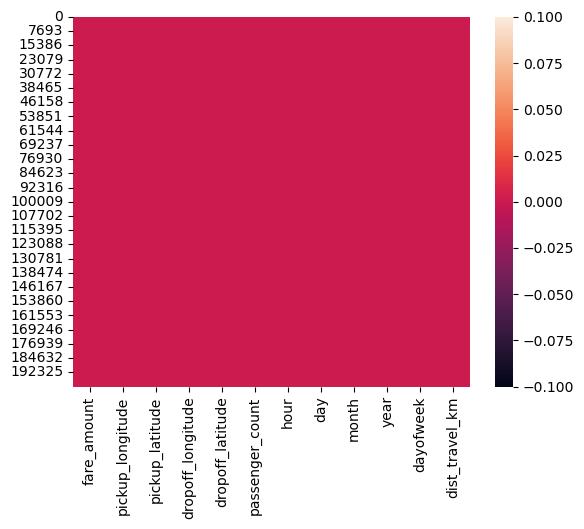

In [60]:
sns.heatmap(df.isnull()) #Free for null values

In [61]:
corr = df.corr() #Function to find the correlation

In [62]:
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154069,-0.110842,0.218675,-0.125898,0.015778,-0.023623,0.004534,0.030817,0.141277,0.013652,0.786385
pickup_longitude,0.154069,1.000000,0.259497,0.425619,0.073290,-0.013213,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.048446
pickup_latitude,-0.110842,0.259497,1.000000,0.048889,0.515714,-0.012889,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.073362
dropoff_longitude,0.218675,0.425619,0.048889,1.000000,0.245667,-0.009303,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.155191
dropoff_latitude,-0.125898,0.073290,0.515714,0.245667,1.000000,-0.006308,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.052701
passenger_count,0.015778,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009884
hour,-0.023623,0.011579,0.029681,-0.046558,0.019783,0.020274,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.035708
day,0.004534,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001709
month,0.030817,0.001169,0.001562,0.002391,-0.001193,0.010351,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010050
year,0.141277,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.022294


<Axes: >

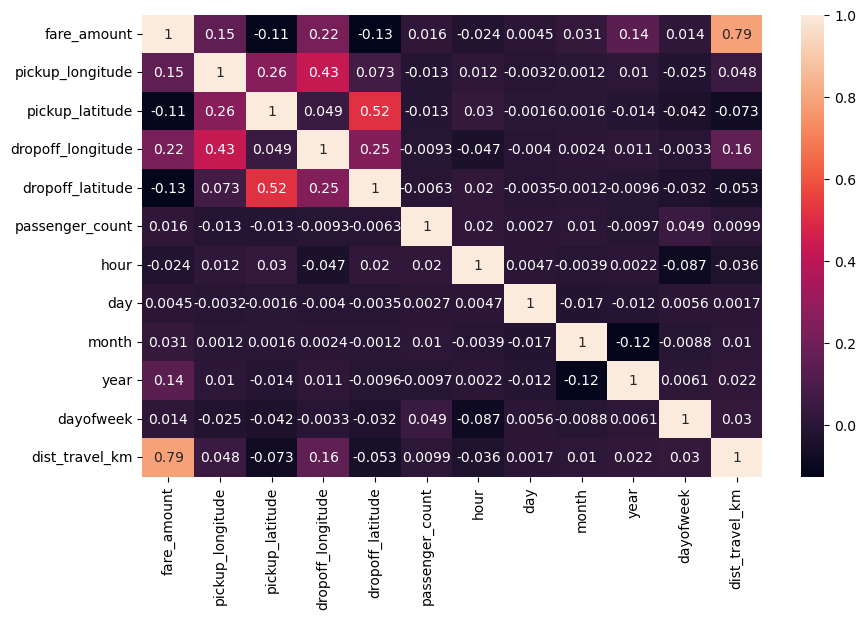

In [66]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True) #Correlation Heatmap (Light values means highly correlated)

In [71]:
##Dividing the dataset into training and testing dataset
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]

In [74]:
y = df['fare_amount']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.20)

In [76]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
30268,-73.985602,40.778565,-73.978909,40.762444,1.0,10,30,6,2009,1,1.879094
376,-73.981443,40.741223,-73.970090,40.756593,1.0,8,31,1,2012,1,1.958453
58422,-73.971828,40.781825,-73.985663,40.757988,3.5,13,18,6,2012,0,2.895312
81969,-74.003795,40.707725,-73.980227,40.737672,1.0,16,12,9,2013,3,3.877277
95132,-73.982676,40.777123,-73.969811,40.763152,1.0,13,22,3,2012,3,1.893964
...,...,...,...,...,...,...,...,...,...,...,...
167497,-73.954090,40.770601,-73.943062,40.706357,1.0,0,28,6,2012,3,7.203777
95951,-73.969047,40.761005,-73.980620,40.744472,3.5,22,6,5,2010,3,2.080859
111729,-73.997663,40.720753,-74.003028,40.749343,1.0,14,12,11,2011,5,3.211040
188339,-73.993788,40.751660,-73.979160,40.759612,3.5,15,13,5,2012,6,1.516565


In [77]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
20201,-73.929786,40.769751,-73.996065,40.759931,1.0,21,13,11,2013,2,5.687702
142875,-73.957103,40.786077,-73.984084,40.761651,1.0,8,20,6,2010,6,3.541026
19226,-73.990783,40.734937,-73.989835,40.729745,1.0,19,27,6,2013,3,0.582824
137657,-73.982117,40.758197,-73.943127,40.819268,1.0,4,22,11,2011,1,7.542553
84445,-73.975172,40.752197,-73.981012,40.735702,3.5,17,19,11,2011,5,1.899000
...,...,...,...,...,...,...,...,...,...,...,...
129467,-73.986837,40.761091,-73.980352,40.780118,1.0,18,28,9,2012,4,2.185051
23562,-73.953930,40.788030,-73.964467,40.791997,1.0,7,9,8,2009,6,0.990697
184235,-73.980073,40.745600,-73.975210,40.751880,1.0,7,15,3,2011,1,0.809596
38955,-73.957727,40.771082,-74.013650,40.713555,3.5,18,5,11,2011,5,7.944478


In [78]:
y_train

30268      6.10
376        6.50
58422     12.50
81969     16.50
95132      8.50
          ...  
167497    22.25
95951      5.30
111729    10.90
188339     5.70
87857      5.50
Name: fare_amount, Length: 160000, dtype: float64

In [79]:
y_test

20201     22.25
142875     7.70
19226      5.00
137657    17.30
84445     12.10
          ...  
129467     8.00
23562      3.70
184235     4.50
38955     20.90
169065     9.70
Name: fare_amount, Length: 40000, dtype: float64

In [80]:
##Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [81]:
regression.fit(X_train,y_train)

LinearRegression()

In [82]:
regression.intercept_ #To find the linear intercept

3689.634998510298

In [83]:
regression.coef_ #To find the linear coeeficient

array([ 2.53868666e+01, -7.22251928e+00,  2.03514173e+01, -1.82154010e+01,
        6.50518549e-02,  5.71090367e-03,  3.36782942e-03,  5.95972460e-02,
        3.65344511e-01, -3.01238335e-02,  1.84286018e+00])

In [84]:
prediction = regression.predict(X_test) #To predict the target values

In [85]:
print(prediction)

[16.68999892 10.56989192  6.36960839 ...  5.91866057 19.9143524
 10.32513249]


In [86]:
y_test

20201     22.25
142875     7.70
19226      5.00
137657    17.30
84445     12.10
          ...  
129467     8.00
23562      3.70
184235     4.50
38955     20.90
169065     9.70
Name: fare_amount, Length: 40000, dtype: float64

In [87]:
##Metrics Evaluation using R2, Mean Squared Error, Root Mean Sqared Error

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score(y_test,prediction)

0.6686024803324819

In [90]:
from sklearn.metrics import mean_squared_error

In [93]:
MSE = mean_squared_error(y_test,prediction)

In [94]:
MSE

9.9013640258812

In [96]:
RMSE = np.sqrt(MSE)

In [97]:
RMSE

3.146643294986135

In [98]:
##Random Forest Regression

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
rf = RandomForestRegressor(n_estimators=50) #Here n_estimators means number of trees you want to build before making the prediction

In [101]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=50)

In [102]:
y_pred = rf.predict(X_test)

In [103]:
y_pred

array([22.25 , 10.268,  4.44 , ...,  4.232, 18.579,  9.318])

In [104]:
##Metrics evaluatin for Random Forest

In [105]:
R2_Random = r2_score(y_test,y_pred)

In [106]:
R2_Random

0.795520050799389

In [107]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [109]:
MSE_Random

6.109371050997002

In [110]:
RMSE_Random = np.sqrt(MSE_Random)

In [111]:
RMSE_Random

2.4717141928218567